Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:

data = pd.read_csv("/content/Automobile_data.csv")

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [5]:

data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.264780,3.191902,7.571805,103.239024,5075.365854,25.219512,30.751220,12949.429268
std,1.245307,58.282073,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.535268,0.549625,6.251661,40.832470,694.650771,6.542142,6.886443,8079.043284
min,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,16.000000,0.000000
25%,0.000000,77.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.100000,0.000000,70.000000,4800.000000,19.000000,25.000000,7689.000000
50%,1.000000,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,8.700000,95.000000,5200.000000,24.000000,30.000000,10198.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.mean()

<ipython-input-7-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


symboling                0.834146
normalized-losses       97.600000
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.264780
stroke                   3.191902
compression-ratio        7.571805
horsepower             103.239024
peak-rpm              5075.365854
city-mpg                25.219512
highway-mpg             30.751220
price                12949.429268
dtype: float64

In [8]:
data.replace("?", np.nan, inplace = True)
data["num-of-doors"].replace(np.nan, "four", inplace=True)


In [9]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:

data.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Finding null values

In [13]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [14]:
data['body-style'].replace({"convertible":0,"hardtop":1,"hatchback":2,"sedan":3,"wagon":4},inplace=True)

In [15]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,2,rwd,front,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,3,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,3,4wd,front,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [16]:
data['drive-wheels'].replace({"4wd":"fwd"},inplace=True)


In [17]:
data.head()

print(data)


     symboling  normalized-losses         make fuel-type aspiration  \
0            3                  0  alfa-romero       gas        std   
1            3                  0  alfa-romero       gas        std   
2            1                  0  alfa-romero       gas        std   
3            2                164         audi       gas        std   
4            2                164         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1                 95        volvo       gas        std   
201         -1                 95        volvo       gas      turbo   
202         -1                 95        volvo       gas        std   
203         -1                 95        volvo    diesel      turbo   
204         -1                 95        volvo       gas      turbo   

    num-of-doors  body-style drive-wheels engine-location  wheel-base  ...  \
0            two           0          rwd           front        88.6

In [18]:
mean = data['normalized-losses'].mean()

In [20]:
data['normalized-losses'].replace({0:mean},inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,alfa-romero,gas,std,two,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,97.6,alfa-romero,gas,std,two,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,97.6,alfa-romero,gas,std,two,2,rwd,front,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,3,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,3,fwd,front,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [21]:
data['drive-wheels'].replace({"fwd":0,"rwd":1},inplace=True)

data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,alfa-romero,gas,std,two,0,1,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,97.6,alfa-romero,gas,std,two,0,1,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,97.6,alfa-romero,gas,std,two,2,1,front,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,3,0,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,3,0,front,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [22]:
data['num-of-doors'].replace({0:"four"},inplace=True)

data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,alfa-romero,gas,std,two,0,1,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,97.6,alfa-romero,gas,std,two,0,1,front,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,97.6,alfa-romero,gas,std,two,2,1,front,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,3,0,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,3,0,front,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [23]:

data['engine-location'].replace({"front":0,"rear":1},inplace=True)

data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,alfa-romero,gas,std,two,0,1,0,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,97.6,alfa-romero,gas,std,two,0,1,0,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,97.6,alfa-romero,gas,std,two,2,1,0,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,3,0,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,3,0,0,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [24]:
data['make'].replace({"front":0,"rear":1},inplace=True)

data.head()



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,alfa-romero,gas,std,two,0,1,0,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,97.6,alfa-romero,gas,std,two,0,1,0,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,97.6,alfa-romero,gas,std,two,2,1,0,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,3,0,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,3,0,0,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [25]:
data['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [26]:
label_enc=LabelEncoder()

print(label_enc)


LabelEncoder()


In [27]:
data['make']= label_enc.fit_transform(data['make'])

data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,0,gas,std,two,0,1,0,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,13495
1,3,97.6,0,gas,std,two,0,1,0,88.6,...,130,mpfi,3.47,2.68,0.0,111,5000,21,27,16500
2,1,97.6,0,gas,std,two,2,1,0,94.5,...,152,mpfi,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164.0,1,gas,std,four,3,0,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,1,gas,std,four,3,0,0,99.4,...,136,mpfi,3.19,3.40,0.0,115,5500,18,22,17450


In [28]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,21,gas,std,four,3,1,0,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95.0,21,gas,turbo,four,3,1,0,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95.0,21,gas,std,four,3,1,0,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95.0,21,diesel,turbo,four,3,1,0,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95.0,21,gas,turbo,four,3,1,0,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Missing values,encoding,scaling

In [29]:
data['aspiration']= label_enc.fit_transform(data['aspiration'])

data['engine-type']= label_enc.fit_transform(data['engine-type'])

data['engine-location']= label_enc.fit_transform(data['engine-location'])

data['num-of-cylinders']= label_enc.fit_transform(data['num-of-cylinders'])

data['num-of-doors'].replace({"four":0,"two":1},inplace=True)

data['fuel-type']= label_enc.fit_transform(data['fuel-type'])

data['fuel-system']= label_enc.fit_transform(data['fuel-system'])

In [30]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,0,1,0,1,0,1,0,88.6,...,130,5,3.47,2.68,0.0,111,5000,21,27,13495
1,3,97.6,0,1,0,1,0,1,0,88.6,...,130,5,3.47,2.68,0.0,111,5000,21,27,16500
2,1,97.6,0,1,0,1,2,1,0,94.5,...,152,5,2.68,3.47,0.0,154,5000,19,26,16500
3,2,164.0,1,1,0,0,3,0,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,0.0,115,5500,18,22,17450


In [31]:
data.dtypes


symboling              int64
normalized-losses    float64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors          object
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [32]:
data = data.loc[data['price']!='?']
data['price'] = data['price'].astype(int)


<ipython-input-40-eb9dbe3d0eea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr('pearson'),annot=True)


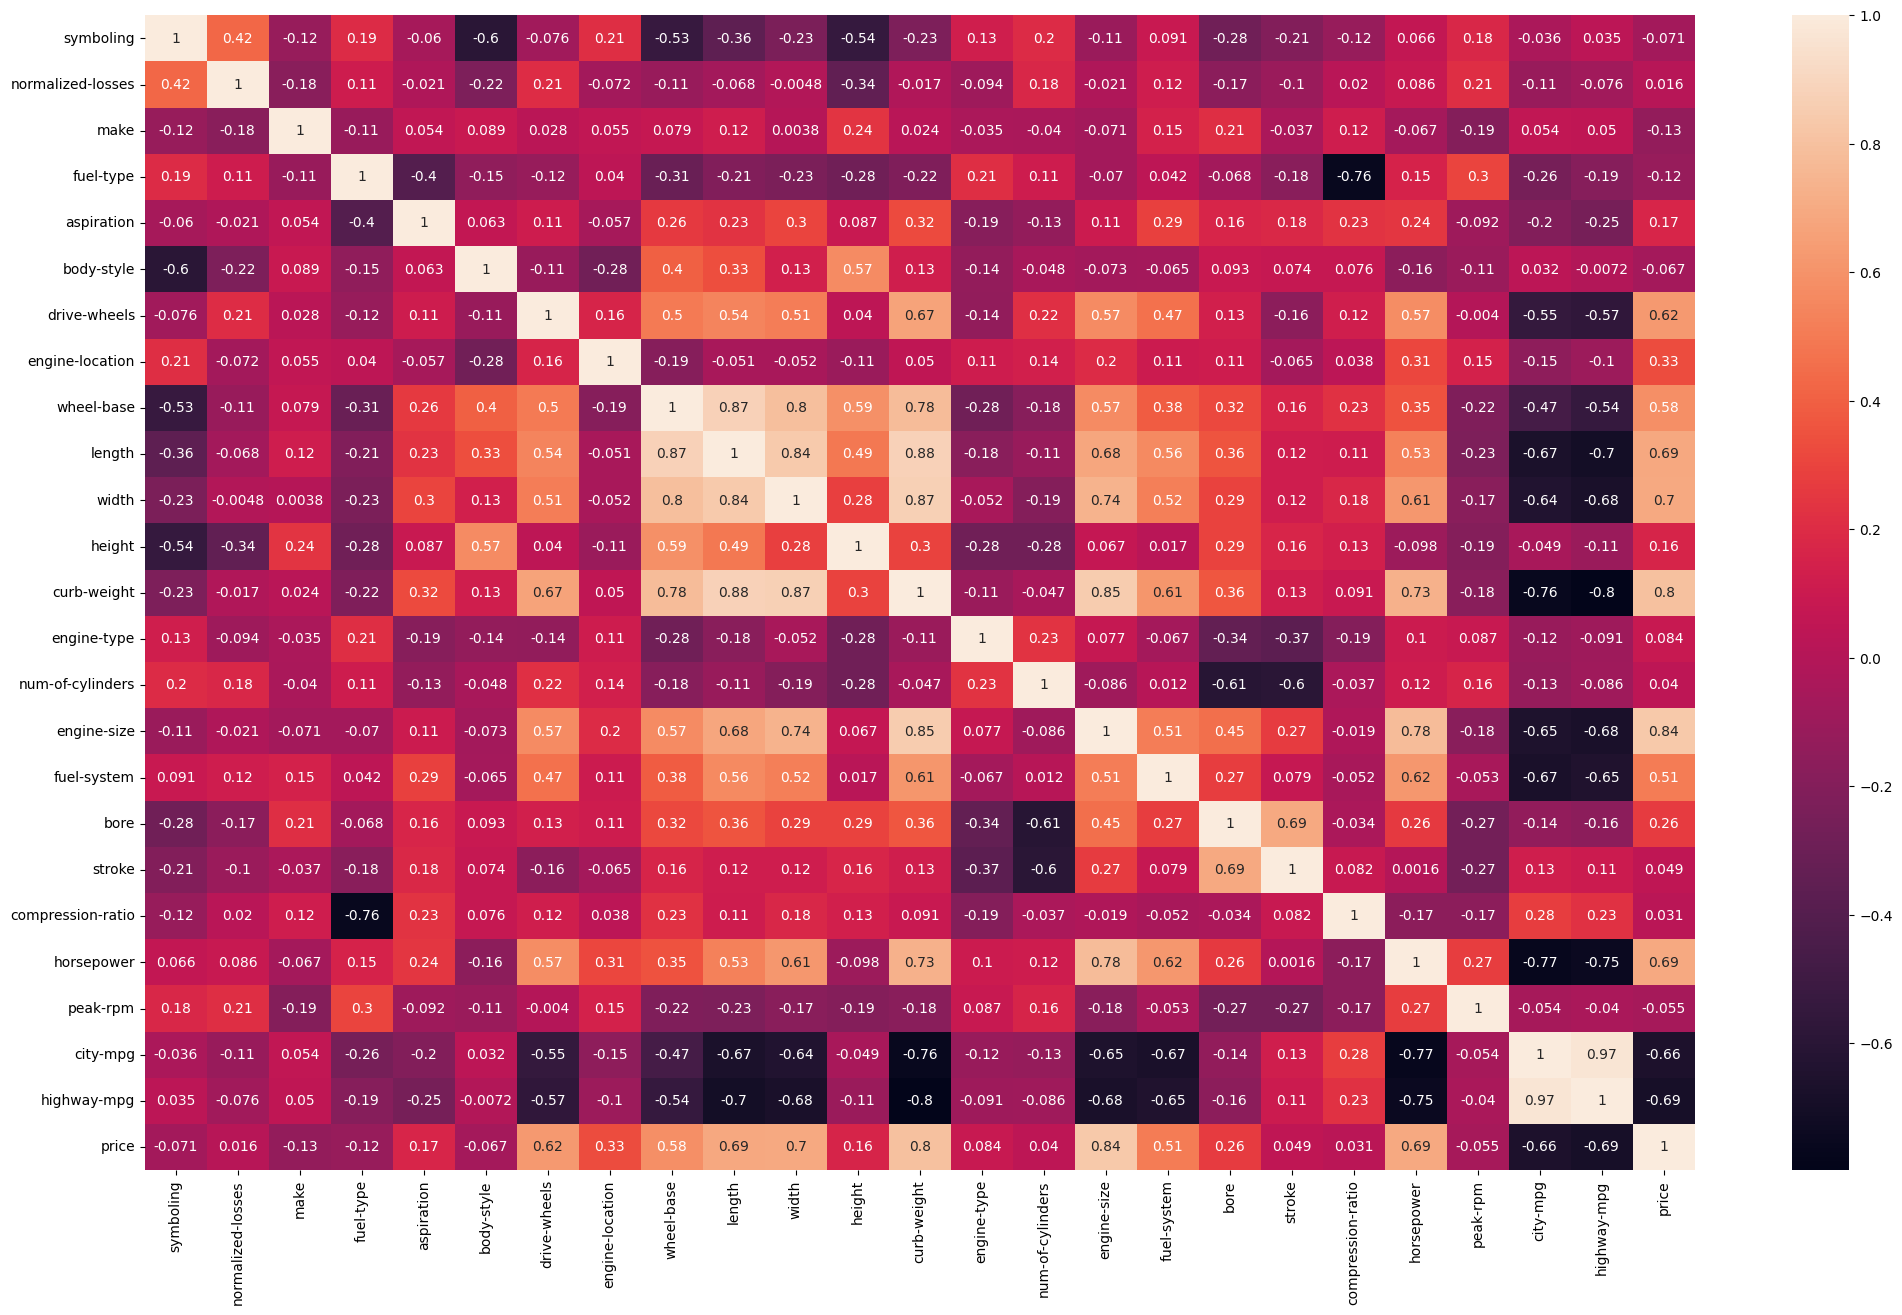

In [40]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr('pearson'),annot=True)
plt.show()


In [41]:
final_data = data[['engine-size','price']]
predictor = data['engine-size']
target = data['price']


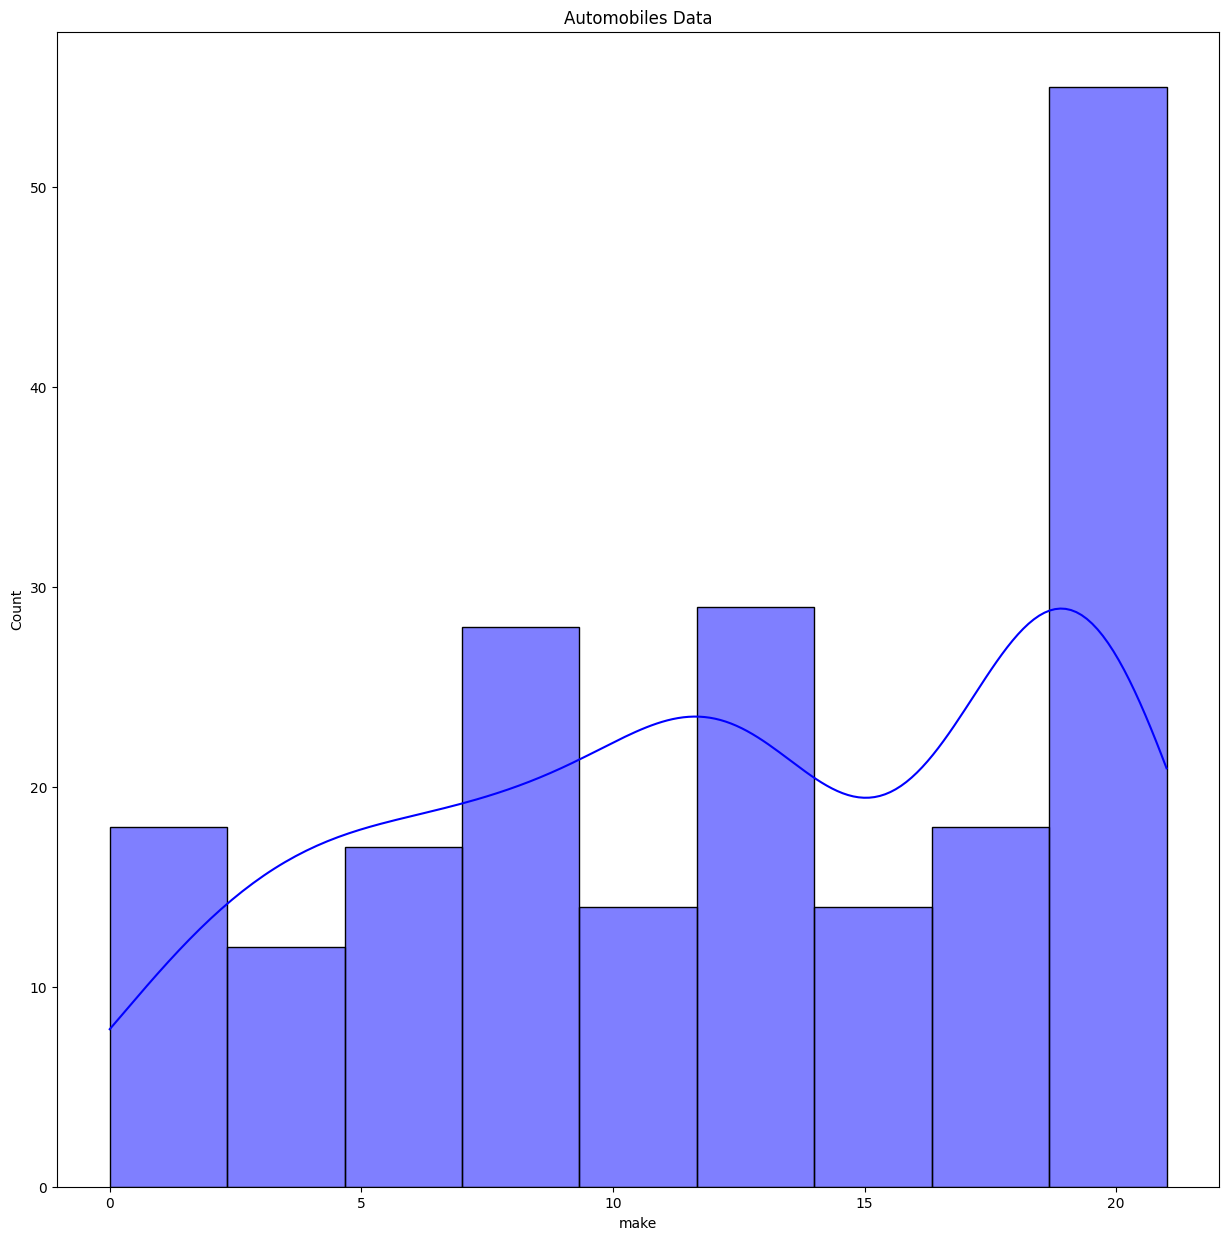

In [45]:
plt.figure(figsize=(15,15))

data['make'] = data['make'].astype(int)
data['engine-location'] = data['engine-location'].astype(int)
sns.histplot(data['make'], color='blue', kde=True)
plt.title('Automobiles Data')
plt.show()



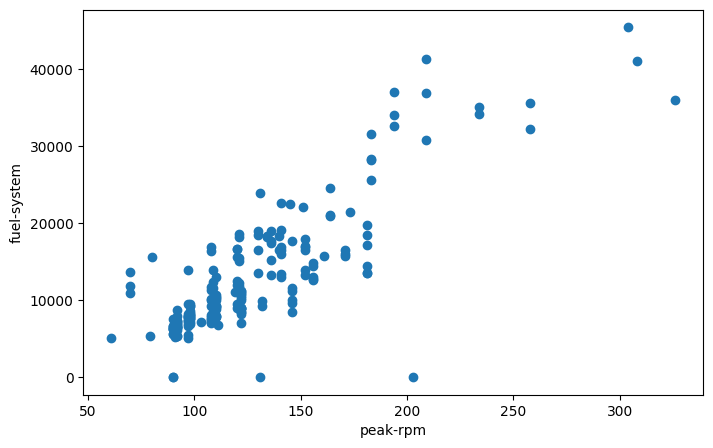

In [47]:
plt.figure(figsize=(8,5))
plt.scatter(predictor,target)
plt.xlabel("peak-rpm")
plt.ylabel("fuel-system")
plt.show()
def linear(X,b0,b1):
    return[b1*x+b0 for x in X]

def linear(X,b0,b1):
    return[b1*x+b0 for x in X]
def intercept(X,Y,b1):
    x_=np.mean(X)
    y_=np.mean(Y)
    
    return y_-b1*x_
def slope(X,Y):
    x_=np.mean(X)
    y_=np.mean(Y)
    
    rise= sum([(x-x_)*(y-y_) for x,y in zip(X,Y)])
    run=sum([(x-x_)**2 for x,y in zip(X,Y)])
    
    return rise/run

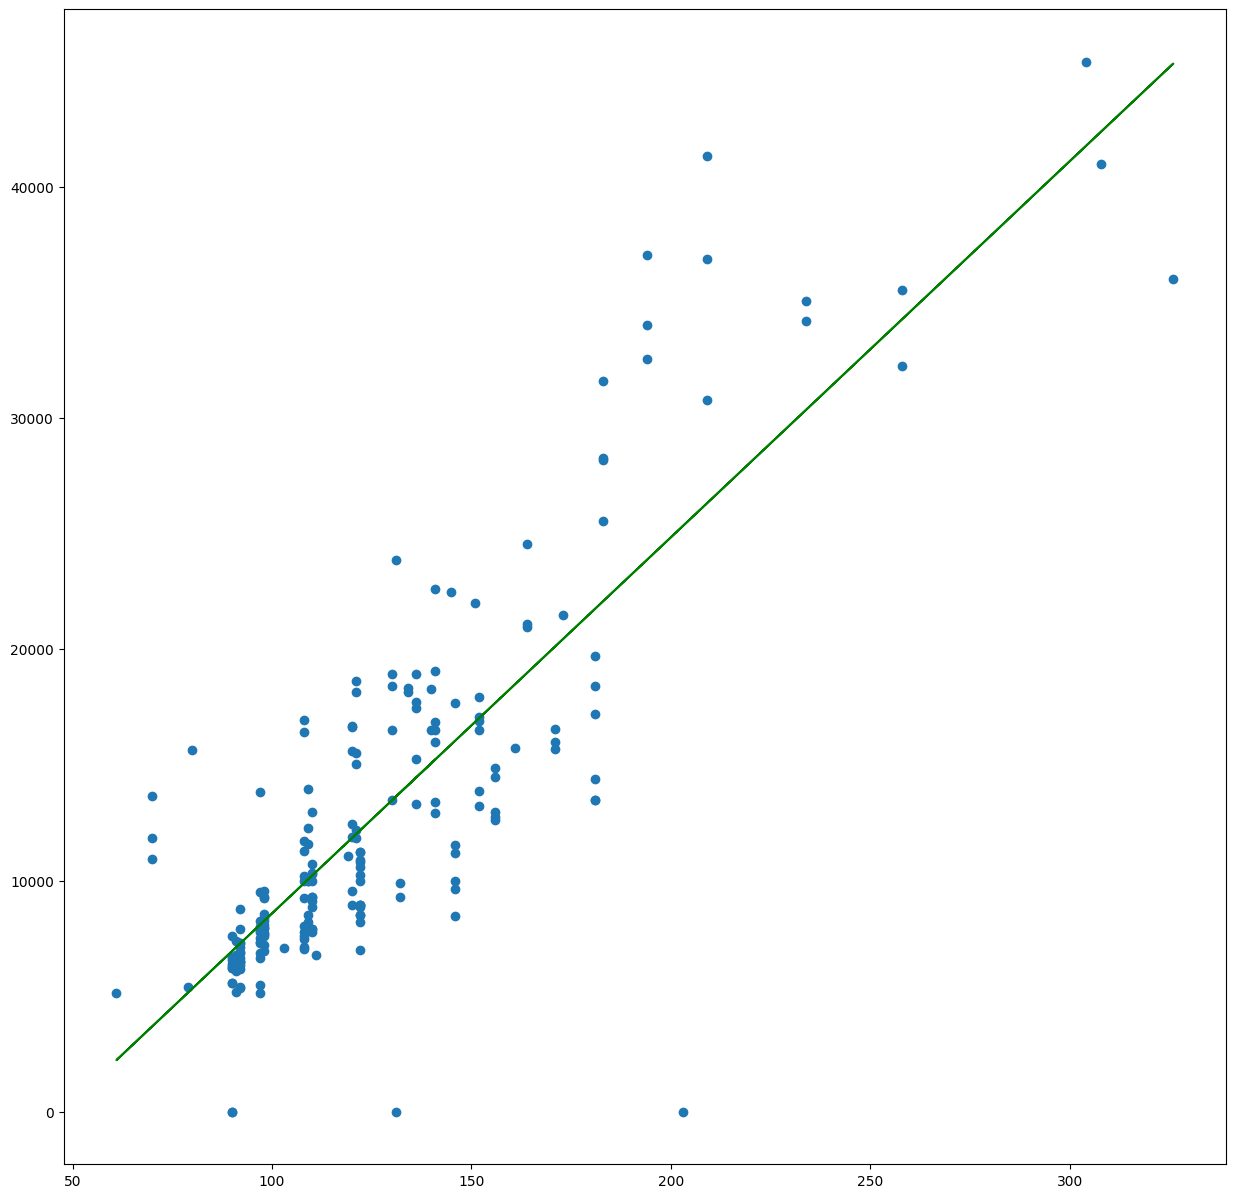

In [49]:
b1 = slope(predictor,target)
b0 = intercept(predictor,target,b1)
prediction = linear(predictor,b0,b1)
plt.figure(figsize=(15,15))
plt.scatter(predictor,target)
plt.plot(predictor,prediction,color='g')
plt.show()

Building and Evaluating Machile Learning Model

In [51]:
x=data.drop('price', axis=1)
y=data['price']


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [56]:
log_reg = LogisticRegression(max_iter=1000)


In [60]:
log_reg.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [61]:
pred=log_reg.predict(x_test)

In [62]:
print(metrics.classification_report(y_test,pred))

metrics.confusion_matrix(y_test,pred)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
        5118       0.00      0.00      0.00       1.0
        5151       0.00      0.00      0.00       1.0
        5348       0.00      0.00      0.00       0.0
        5389       0.00      0.00      0.00       1.0
        5499       0.00      0.00      0.00       1.0
        5572       0.00      0.00      0.00       0.0
        6095       0.00      0.00      0.00       0.0
        6189       0.00      0.00      0.00       0.0
        6295       0.00      0.00      0.00       0.0
        6377       0.00      0.00      0.00       1.0
        6488       0.00      0.00      0.00       1.0
        6529       0.00      0.00      0.00       1.0
        6575       0.00      0.00      0.00       0.0
        6649       0.00      0.00      0.00       0.0
        6795       0.00      0.00      0.00       1.0
        6849       0.00      0.00      0.00       1.0
        6855       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
metrics.confusion_matrix(y_test,pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
correlations=data.corr(method='pearson')
print("correlation of attributes:\n")
print(correlations)

correlation of attributes:

                   symboling  normalized-losses      make  fuel-type  \
symboling           1.000000           0.424779 -0.118794   0.194311   
normalized-losses   0.424779           1.000000 -0.177713   0.109048   
make               -0.118794          -0.177713  1.000000  -0.113191   
fuel-type           0.194311           0.109048 -0.113191   1.000000   
aspiration         -0.059866          -0.021489  0.054265  -0.401397   
body-style         -0.596135          -0.222086  0.089494  -0.147853   
drive-wheels       -0.076381           0.205028  0.027704  -0.122035   
engine-location     0.212471          -0.071919  0.054608   0.040070   
wheel-base         -0.531954          -0.112216  0.078505  -0.308346   
length             -0.357612          -0.068480  0.119584  -0.212679   
width              -0.232919          -0.004775  0.003783  -0.233880   
height             -0.541038          -0.342213  0.236233  -0.284631   
curb-weight        -0.227691        

<ipython-input-64-1483faf32cf2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=data.corr(method='pearson')
